Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Load Dataset

In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv('udemy_output_All_Finance__Accounting_p1_p626.csv')

# To display the first few rows of the dataframe to confirm it's loaded correctly
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84.0,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78.0,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292.0,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338.0,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83.0,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


Data Preprocessing

In [17]:
print(df.isnull().sum())  # Check missing values

df.dropna(inplace=True)  # Drops rows with any missing values

print(df.shape)  # Prints the new dimensions of the DataFrame
df.head()  # Displays the first few rows of the modified DataFrame

print(df.isnull().sum())  # Recheck to confirm no more missing values

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        1
is_wishlisted                      1
num_published_lectures             1
num_published_practice_tests       1
created                            1
published_time                     1
discount_price__amount          2594
discount_price__currency        2594
discount_price__price_string    2594
price_detail__amount             995
price_detail__currency           995
price_detail__price_string       996
dtype: int64
(20122, 20)
id                              0
title                           0
url                             0
is_paid                         0
num_subscribers                 0
avg_rating                      0
avg_rating_recent              

In [18]:
df = pd.get_dummies(df, columns=['is_paid', 'discount_price__price_string', 'price_detail__price_string'], drop_first=True)
print(df.head())

        id                                              title  \
0   762616  The Complete SQL Bootcamp 2020: Go from Zero t...   
1   937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...   
2  1361790             PMP Exam Prep Seminar -  PMBOK Guide 6   
3   648826         The Complete Financial Analyst Course 2020   
4   637930  An Entire MBA in 1 Course:Award Winning Busine...   

                                                 url num_subscribers  \
0                 /course/the-complete-sql-bootcamp/          295509   
1                                 /course/tableau10/          209070   
2                        /course/pmp-pmbok6-35-pdus/          155282   
3     /course/the-complete-financial-analyst-course/          245860   
4  /course/an-entire-mba-in-1-courseaward-winning...          374836   

   avg_rating avg_rating_recent   rating num_reviews is_wishlisted  \
0     4.66019           4.67874  4.67874       78006         False   
1     4.58956           4.60015  4.6

In [20]:
X = df[['avg_rating', 'num_reviews', 'num_published_lectures', 'discount_price__amount', 'price_detail__amount']]
y = df['num_subscribers']
print(X.head())  # Display the first few rows of the DataFrame X
print(y.head())  # Display the first few rows of the Series y

   avg_rating num_reviews  num_published_lectures discount_price__amount  \
0     4.66019       78006                    84.0                  455.0   
1     4.58956       54581                    78.0                  455.0   
2     4.59491       52653                   292.0                  455.0   
3     4.54407       46447                   338.0                  455.0   
4     4.47080       41630                    83.0                  455.0   

  price_detail__amount  
0               8640.0  
1               8640.0  
2               8640.0  
3               8640.0  
4               8640.0  
0    295509
1    209070
2    155282
3    245860
4    374836
Name: num_subscribers, dtype: object


Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Check the Shape of the Arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16097, 5)
X_test shape: (4025, 5)
y_train shape: (16097,)
y_test shape: (4025,)


In [24]:
# View the Contents of the Arrays
print("X_train sample data:", X_train.head())
print("X_test sample data:", X_test.head())
print("y_train sample data:", y_train.head())
print("y_test sample data:", y_test.head())

X_train sample data:        avg_rating num_reviews  num_published_lectures discount_price__amount  \
16717     4.31944          41                    86.0                  455.0   
19510     4.42857           7                     7.0                  455.0   
2887      4.25000          79                    26.0                  455.0   
17970     0.00000           0                    10.0                  455.0   
14957     4.00000           8                    36.0                  455.0   

      price_detail__amount  
16717               1280.0  
19510               1280.0  
2887                8640.0  
17970               1280.0  
14957               8640.0  
X_test sample data:        avg_rating num_reviews  num_published_lectures discount_price__amount  \
7724         3.75           8                    12.0                  455.0   
10785        4.05          17                     6.0                  455.0   
4408         4.20          37                    14.0           

In [25]:
# Confirm the Split Ratio
total_samples = len(X)
train_percentage = len(X_train) / total_samples * 100
test_percentage = len(X_test) / total_samples * 100

print(f"Training data percentage: {train_percentage}%")
print(f"Test data percentage: {test_percentage}%")

Training data percentage: 79.99701818904681%
Test data percentage: 20.002981810953184%


Train the Model

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Make Predictions

In [29]:
y_pred = model.predict(X_test)
print(model)
print(X_test.head())

RandomForestRegressor(random_state=42)
       avg_rating num_reviews  num_published_lectures discount_price__amount  \
7724         3.75           8                    12.0                  455.0   
10785        4.05          17                     6.0                  455.0   
4408         4.20          37                    14.0                  455.0   
8735         4.00           5                    16.0                  455.0   
5851         4.05          20                    15.0                  455.0   

      price_detail__amount  
7724                8640.0  
10785               1280.0  
4408                6400.0  
8735                6400.0  
5851                8640.0  


Evaluate the Model

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 22100828.68752946
R-squared: 0.7132653007983047


Visualize Results

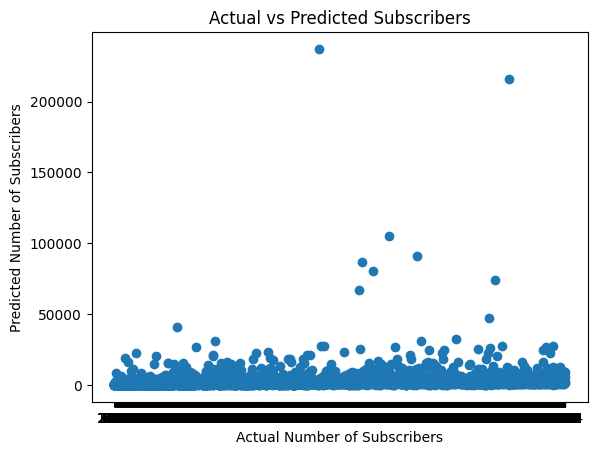

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Number of Subscribers")
plt.ylabel("Predicted Number of Subscribers")
plt.title("Actual vs Predicted Subscribers")
plt.show()